# Taller de Procesamiento de Lenguaje Natural: Recuperaci√≥n de Informaci√≥n Aplicada a Entrevistas y Libros de la Comisi√≥n de la Verdad

**Autores**  
- **Juan Aponte Duque**  
  Pontificia Universidad Javeriana  
  [aponte.juan@javeriana.edu.co](mailto:aponte.juan@javeriana.edu.co)

- **Cristian Cardozo Amin**  
  Pontificia Universidad Javeriana  
  [cristiancardozo@javeriana.edu.co](mailto:cristiancardozo@javeriana.edu.co)

- **Benkos Triana Ocampo**  
  Pontificia Universidad Javeriana  
  [b.triana@javeriana.edu.co](mailto:b.triana@javeriana.edu.co)


## Objetivo 
Desarrollar  un  proceso  de  Recuperaci√≥n  de  Informaci√≥n  (IR)  para  determinar  qu√© entrevistas  contenidas  en  el  documento  JSON  est√°n  relacionadas  con testimonios  o  secciones de los libros de la Comisi√≥n de la Verdad (CEV). Se espera que los estudiantes  apliquen t√©cnicas de procesamiento de lenguaje natural para analizar y  relacionar  las narraciones  de  entrevistas  con  textos  espec√≠ficos  de  los  libros,  utilizando  m√©tricas espec√≠ficas para medir la relevancia de los resultados.

## Recursos:
- **Libros de la Comisi√≥n de la Verdad (CEV)**:

[https://drive.google.com/drive/folders/1W9UOdkqnAcztnFZ8xresW4ZeZ2pqXe4v?usp=sharing]
- **Entrevistas**:

[https://drive.google.com/file/d/1XeFS_mQFmTLQ_VUiODTBO5eONWv-Ege5/view?usp=sharing]

- **Tesauro CEV**:

[https://drive.google.com/file/d/1XgZzMtFQp0RzwqdY7Em5q5ProsWLMMX4/view?usp=sharing]

---
---
## Dependecias

In [8]:
import pandas as pd
import sys
from pandarallel import pandarallel

# Inicializar pandarallel
pandarallel.initialize(progress_bar=True)
sys.path.append("../src")
from funciones_nlp import *
from funciones_pdf import *
from funciones_json import *
from funciones_abt import *

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


---
---
## Extracci√≥n y Preparaci√≥n del Corpus

### Extraer las secciones, testimonios o partes relevantes de cada uno de los libros de la CEV.

#### Extraccion Libro "MI CUERPO ES LA VERDAD"

In [2]:
# Ruta del archivo PDF del libro de la CEV
pdf_path = "../data/input/CEV_MI CUERPO ES LA VERDAD_DIGITAL_2022.pdf"

# P√°gina inicial para comenzar la extracci√≥n 
START_AFTER_PAGE_1BASED = 37  

# Definici√≥n de la estructura del libro para la extracci√≥n
schema = {
    "Mujeres": {
        "¬øQu√© pas√≥? Significados y  magnitudes de lo sucedido": [
            "La guerra, el territorio y las mujeres",
            "Las violencias sexuales y reproductivas contra ni√±as y mujeres",
            "Mujeres pol√≠ticas expulsadas de la democracia",
            "Las mujeres en la guerra: vinculaci√≥n e impactos en sus vidas y en sus familias",
        ],
        "¬øPor qu√© pas√≥? Dimensiones del patriarcado": [
            "El cont√≠nuum de violencias, una realidad que cambia pero no desaparece",
            "El mandato de las masculinidades guerreras y su relaci√≥n con el militarismo",
            "La desprotecci√≥n por parte del Estado en zonas de conflicto",
        ],
        "¬øQu√© pas√≥ con lo que pas√≥?": [
            "Impactos del conflicto armado en las mujeres",
            "Afrontamientos de las mujeres v√≠ctimas",
            "Resistencias, juntanza y organizaci√≥n: en las mujeres reposa la fuerza de la comunidad",
        ],
        "_end_before": "Ep√≠logo",
        "_boundaries": [
            "¬øPor qu√© pas√≥? Dimensiones del patriarcado",
            "¬øQu√© pas√≥ con lo que pas√≥?",
        ],
    },
    "LGBTIQ+": {
        "¬øQu√© pas√≥? Violencias contra las personas LGBTIQ+ en el marco del conflicto armado colombiano": [
            "Una mirada general a las violencias contra las personas LGBTIQ+ en la guerra",
            "Situaciones territoriales ilustrativas de la persecuci√≥n contra personas LGBTIQ+ en el marco del conflicto armado",
            "La persecuci√≥n contra personas LGBTIQ+ en el conflicto armado colombiano",
            "Patrones de persecuci√≥n contra las personas LGBTIQ+ diferenciados seg√∫n el actor armado",
            "Otras consideraciones",
        ],
        "Los porqu√©s de la persecuci√≥n contra personas LGBTIQ+": [
            "La herencia colonial como un factor hist√≥rico explicativo",
            "Factores socioculturales",
            "Factores institucionales y pol√≠ticos",
        ],
        "¬øQu√© pas√≥ con lo que les pas√≥ a las personas LGBTIQ+ en el marco del conflicto armado colombiano?": [
            "Impactos de las violencias contra personas LGBTIQ+",
            "Afrontamientos de personas LGBTIQ+ v√≠ctimas del conflicto armado en Colombia",
            "Cuerpos disidentes que resisten y transforman para la paz",
        ],
        "_end_before": "Conclusiones",
        "_boundaries": [
            "Los porqu√©s de la persecuci√≥n contra personas LGBTIQ+",
            "¬øQu√© pas√≥ con lo que les pas√≥ a las personas LGBTIQ+ en el marco del conflicto armado colombiano?",
        ],
    },
}

# Funci√≥n para extraer el DataFrame del PDF seg√∫n el esquema definido
df_result = extract_dataframe_from_pdf(pdf_path, START_AFTER_PAGE_1BASED, schema, drop_empty=False)
print(df_result.shape)
df_result.head(3)

(21, 4)


seccion                                  seccion_principal  \
0  Mujeres  ¬øQu√© pas√≥? Significados y  magnitudes de lo su...   
1  Mujeres  ¬øQu√© pas√≥? Significados y  magnitudes de lo su...   
2  Mujeres  ¬øQu√© pas√≥? Significados y  magnitudes de lo su...   

                                          subseccion  \
0             La guerra, el territorio y las mujeres   
1  Las violencias sexuales y reproductivas contra...   
2      Mujeres pol√≠ticas expulsadas de la democracia   

                                           contenido  
0  Las mujeres viven la guerra en sus territorios...  
1  Duele la lengua rota. \n¬øD√≥nde est√° mi femenin...  
2  ¬ª.\n\n¬øqu√© pas√≥? significados y magnitudes de ...

#### Extraccion entrevistas de la comision de la verdad

In [2]:
json_path = "../data/input/entrevistas_all_2023-03-21_14-24_05.json"  
columna = 'text'
workers = 6

df_testimonios = procesar_json(json_path, columna, workers)

print(df_testimonios.shape)
df_testimonios.head(3)

Entrevistas vac√≠as detectadas: 2
Se encontraron 268 entrevistas duplicadas.
(2216, 4)


id_doc  pages  \
0  5eb4e7bfda6da3b502da3589.pdf     30   
1  5eb4e7c1da6da3b502da3593.pdf     15   
2  5eb4e7c1da6da3b502da3595.pdf     38   

                                                text  \
0  001-VI-00008\nTEST:¬† Bajo la apariencia de una...   
1  ENT:\nBueno, hoy es --------------------------...   
2  001-VI-00011\n¬†\n001-VI-00011_(48057): ¬†01:30:...   

                                          text_clean  
0  bajo la apariencia de una democracia formal , ...  
1  bueno , hoy es y vamos a empezar la entrevista...  
2  merci , merci . bueno , buenas tardes , buenas...

### Definir la morfolog√≠a de documento para recuperar

#### Morfolog√≠a del libro "MI CUERPO ES LA VERDAD"

In [4]:
contenido_mi_verdad = " ".join(df_result["contenido"].astype(str))
print(contenido_mi_verdad[:500])

Las mujeres viven la guerra en sus territorios, en su vida y en su cuerpo. Esto es verdad 
para cualquier persona que haya sido afectada por el conflicto. Sin embargo, la relaci√≥n 
de las mujeres con el territorio y con la guerra es diferente de la que viven los hombres, 
o los ni√±os, o cualquier otro grupo poblacional. Las mujeres en los territorios son las 
encargadas de las labores de reproducci√≥n y de cuidado del hogar, la familia, lo comunitario y lo social; por ello, suelen permanecer en l


In [5]:
morfologia_texto(contenido_mi_verdad)

{'original': {'oraciones': 6633,
  'cantidad_palabras': 142272,
  'cantidad_palabras_sin_stopwords': 59550,
  'promedio_palabras_por_oracion': 21.44911804613297,
  'promedio_verbos_por_oracion': 3.103271521181969,
  'promedio_sustantivos_por_oracion': 5.7975275139454245,
  'promedio_adjetivos_por_oracion': 1.4483642394090155,
  'promedio_pronombres_por_oracion': 1.8309965324890698,
  'promedio_adverbios_por_oracion': 0.8181818181818182,
  'promedio_stopwords_por_oracion': 12.471279963817278,
  'total_verbos': 20584,
  'total_sustantivos': 38455,
  'total_adjetivos': 9607,
  'total_pronombres': 12145,
  'total_adverbios': 5427,
  'total_stopwords': 82722},
 'sin_stopwords': {'oraciones': 6633,
  'cantidad_palabras': 59550,
  'cantidad_palabras_sin_stopwords': 59550,
  'promedio_palabras_por_oracion': 8.977838082315694,
  'promedio_verbos_por_oracion': 2.052314186642545,
  'promedio_sustantivos_por_oracion': 5.443992160410071,
  'promedio_adjetivos_por_oracion': 1.3259460274385648,
  'pr

#### Textometr√≠a del libro "Mi cuerpo es la verdad"

In [5]:
print_indices_es(contenido_mi_verdad)

=== √çNDICES DE LEGIBILIDAD (ES) ===
Fern√°ndez Huerta: 84.14
Szigriszt-Pazos (INFLESZ): 80.71
Guti√©rrez de Polini: 40.22
Flesch Reading Ease (referencial): 42.96


#### Morfolog√≠a testimonios

In [6]:
contenido_testimonios = " ".join(df_testimonios["text_clean"].astype(str))
print(contenido_testimonios[:1000])

bajo la apariencia de una democracia formal , en colombia se viv√≠a un r√©gimen de terror : servicios de inteligencia estatales ¬ø estamos hablando ... ? ¬ø a partir de qu√© √©poca estamos hablando ? estamos hablando ya a partir de 1985 . entonces , te dec√≠a que servicios de inteligencia oficiales , estructuras de las fuerzas militares y de polic√≠a y del organizaci√≥n p√∫blica 1 se entrelazaban con grupos paramilitares de extrema derecha en desarrollo de una estrategia de contrainsurgencia aparejada con una guerra sucia de liquidaci√≥n y exterminio del movimiento popular colombiano , del que fueron v√≠ctimas opositores pol√≠ticos , sociales y de consciencia . miles de campesinos de las regiones agrarias , -bajo la influencia del movimiento guerrillero- , miles de sindicalistas , adem√°s de defensores de derechos humanos , de jueces de la rep√∫blica que se atrevieron a investigar los cr√≠menes de esa guerra sucia . y , en ese contexto , el genocidio perpetrado contra la uni√≥n patri√≥

In [18]:
morfologia_texto_high_volume(contenido_testimonios, n_process = 7, batch_size=100, chunk_chars=30_000)

Procesando chunks:   0%|          | 0/5904 [00:00<?, ?chunk/s]

{'original': {'oraciones': 1258731,
  'cantidad_palabras': 31058233,
  'cantidad_palabras_sin_stopwords': 10044839,
  'promedio_palabras_por_oracion': 24.674241756181424,
  'promedio_verbos_por_oracion': 4.835129984087148,
  'promedio_sustantivos_por_oracion': 4.3597941100997755,
  'promedio_adjetivos_por_oracion': 1.1062077600376887,
  'promedio_pronombres_por_oracion': 3.45366007510739,
  'promedio_adverbios_por_oracion': 2.0221731251554145,
  'promedio_stopwords_por_oracion': 16.694110179220182,
  'total_verbos': 6086128,
  'total_sustantivos': 5487808,
  'total_adjetivos': 1392418,
  'total_pronombres': 4347229,
  'total_adverbios': 2545372,
  'total_stopwords': 21013394},
 'sin_stopwords': {'oraciones': 1258731,
  'cantidad_palabras': 10044839,
  'cantidad_palabras_sin_stopwords': 10044839,
  'promedio_palabras_por_oracion': 7.9801315769612415,
  'promedio_verbos_por_oracion': 2.7445157066918986,
  'promedio_sustantivos_por_oracion': 3.9881301088159424,
  'promedio_adjetivos_por_o

#### Textometr√≠a de los testimonios

In [ ]:
print_indices_es(contenido_testimoniosFern√°ndez Huerta: 91.54
Szigriszt-Pazos (INFLESZ): 88.47
Guti√©rrez de Polini: 45.53
Flesch Reading Ease (referencial): 53.99)

=== √çNDICES DE LEGIBILIDAD (ES) ===
Fern√°ndez Huerta: 91.54
Szigriszt-Pazos (INFLESZ): 88.47
Guti√©rrez de Polini: 45.53
Flesch Reading Ease (referencial): 53.99


### Preprocesar los textos

#### Preprocesar libro

In [15]:
df_result["contenido_preprocesado"] = df_result["contenido"].parallel_apply(preprocesar_texto)

In [17]:
df_result.head(3)

seccion                                  seccion_principal  \
0  Mujeres  ¬øQu√© pas√≥? Significados y  magnitudes de lo su...   
1  Mujeres  ¬øQu√© pas√≥? Significados y  magnitudes de lo su...   
2  Mujeres  ¬øQu√© pas√≥? Significados y  magnitudes de lo su...   

                                          subseccion  \
0             La guerra, el territorio y las mujeres   
1  Las violencias sexuales y reproductivas contra...   
2      Mujeres pol√≠ticas expulsadas de la democracia   

                                           contenido  \
0  Las mujeres viven la guerra en sus territorios...   
1  Duele la lengua rota. \n¬øD√≥nde est√° mi femenin...   
2  ¬ª.\n\n¬øqu√© pas√≥? significados y magnitudes de ...   

                              contenido_preprocesado  
0  [[mujer, vivir, guerra, territorio, vida, cuer...  
1  [[doler, lengua, roto], [femenino], [lengua, s...  
2  [[], [pasar, significado, magnitudes, sucedido...

In [19]:
df_result.to_csv("../data/output/libro_cev_preprocesado.csv", index=False, encoding="utf-8", sep="|")

#### Preprocesar testimonios

In [19]:
df_testimonios["contenido_preprocesado"] = df_testimonios["text_clean"].parallel_apply(preprocesar_texto)

In [20]:
df_testimonios.head(3)

id_doc  pages  \
0  5eb4e7bfda6da3b502da3589.pdf     30   
1  5eb4e7c1da6da3b502da3593.pdf     15   
2  5eb4e7c1da6da3b502da3595.pdf     38   

                                                text  \
0  001-VI-00008\nTEST:¬† Bajo la apariencia de una...   
1  ENT:\nBueno, hoy es --------------------------...   
2  001-VI-00011\n¬†\n001-VI-00011_(48057): ¬†01:30:...   

                                          text_clean  \
0  bajo la apariencia de una democracia formal , ...   
1  bueno , hoy es y vamos a empezar la entrevista...   
2  merci , merci . bueno , buenas tardes , buenas...   

                              contenido_preprocesado  
0  [[apariencia, democracia, formal, colombia, vi...  
1  [[empezar, entrevista], [pedir, test, presenta...  
2  [[merci, merci], [], [bienvenido, gracias, ven...

In [22]:
df_testimonios.to_csv("../data/output/testimonios_cev_preprocesado.csv", index=False, encoding="utf-8", sep="|")

----
----
## An√°lisis Exploratorio del Corpus

In [9]:
# Cargar los datos preprocesados
df_libro = pd.read_csv("../data/output/libro_cev_preprocesado.csv", sep="|", encoding="utf-8")
df_testimonios = pd.read_csv("../data/output/testimonios_cev_preprocesado.csv", sep="|", encoding="utf-8")

### Frecuencia de los terminos

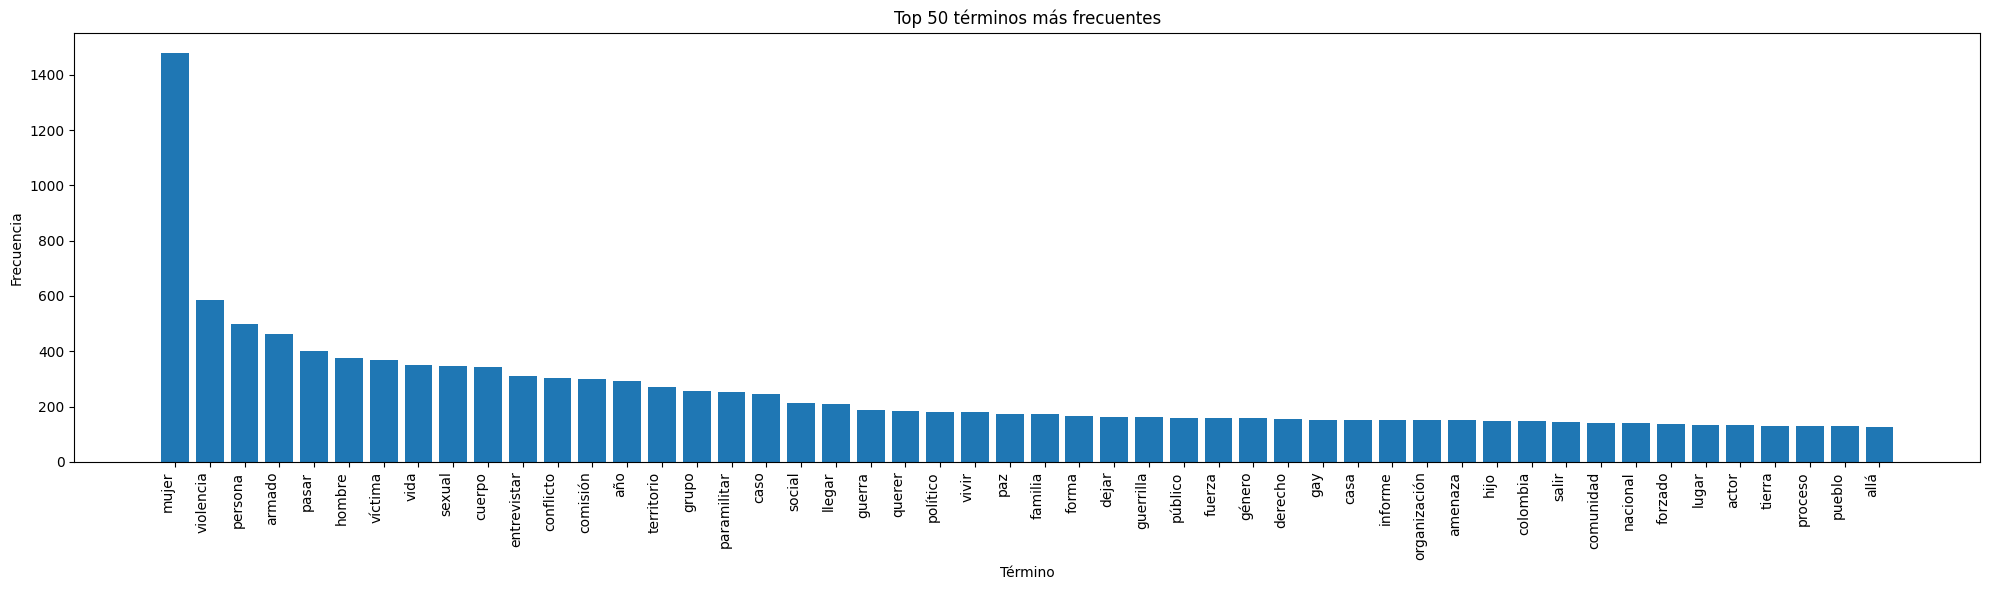

In [4]:
graficar_frecuencias(df_libro, "contenido_preprocesado", top_n=50, min_len=1)

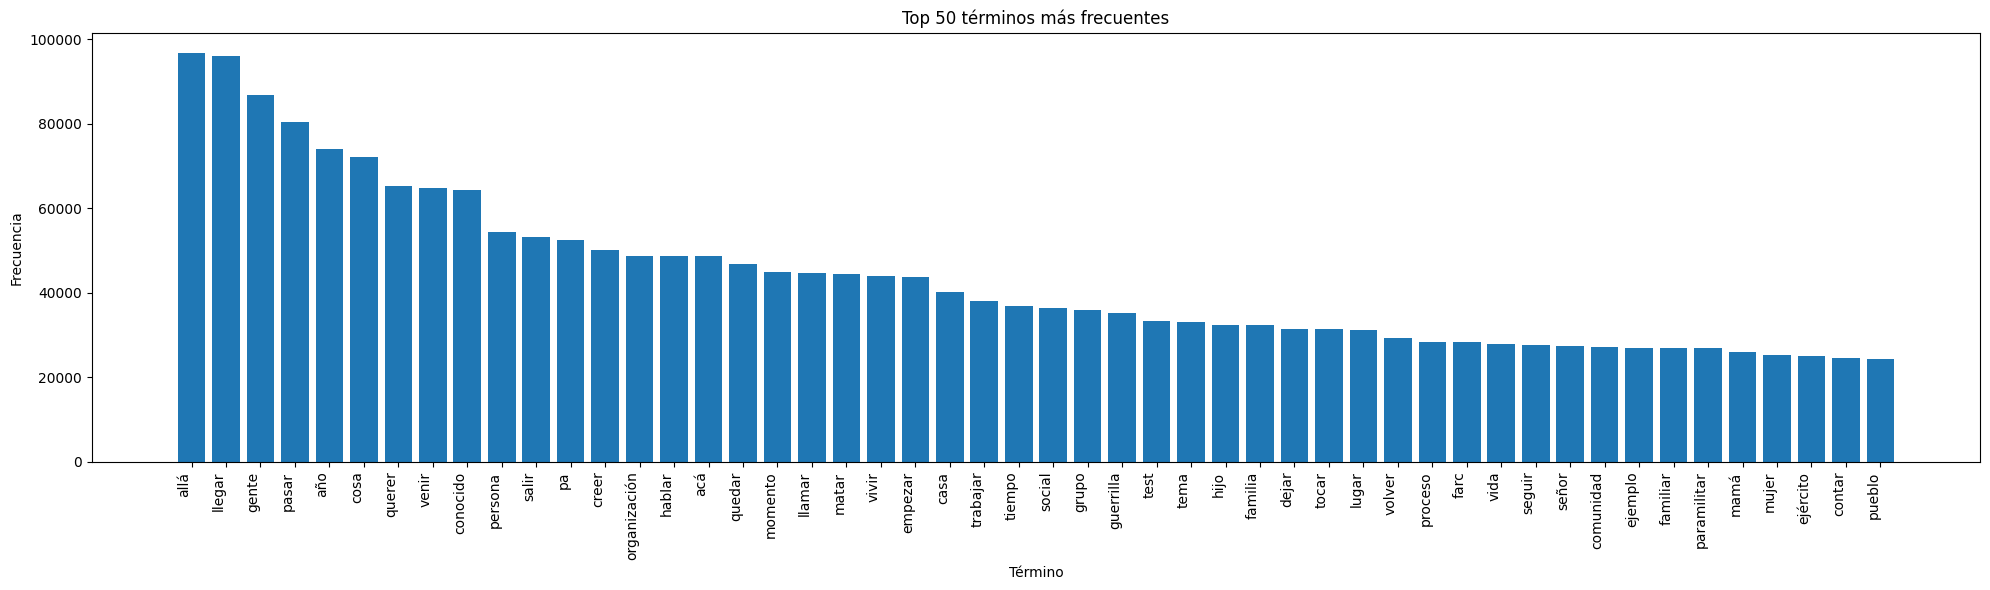

In [5]:
graficar_frecuencias(df_testimonios, "contenido_preprocesado", top_n=50, min_len=1)

### Nube de palabras

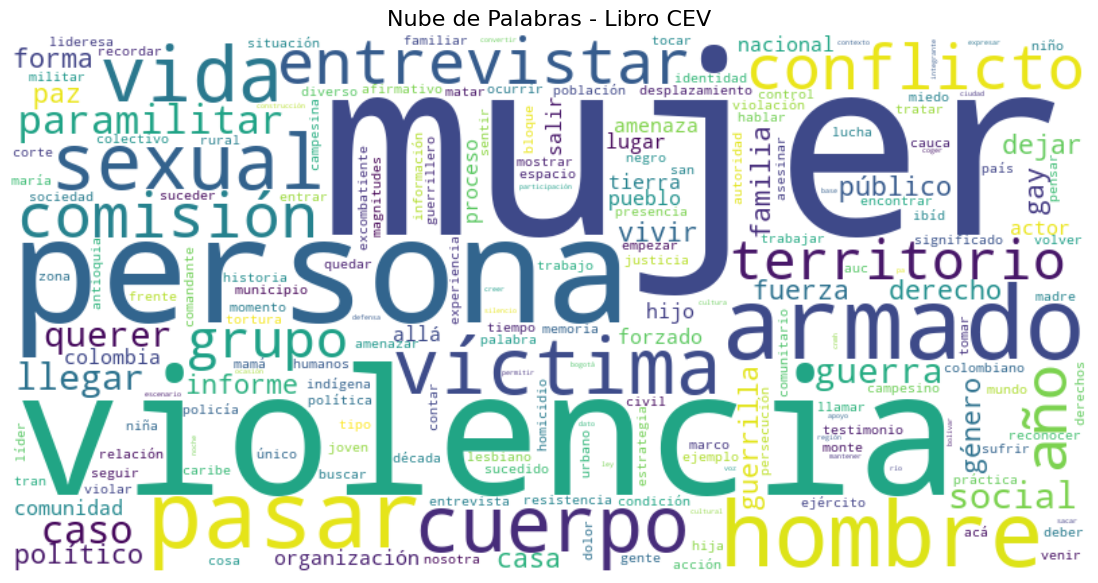

In [3]:
nube_palabras(df_libro, "contenido_preprocesado", min_len=1, titulo="Nube de Palabras - Libro CEV")

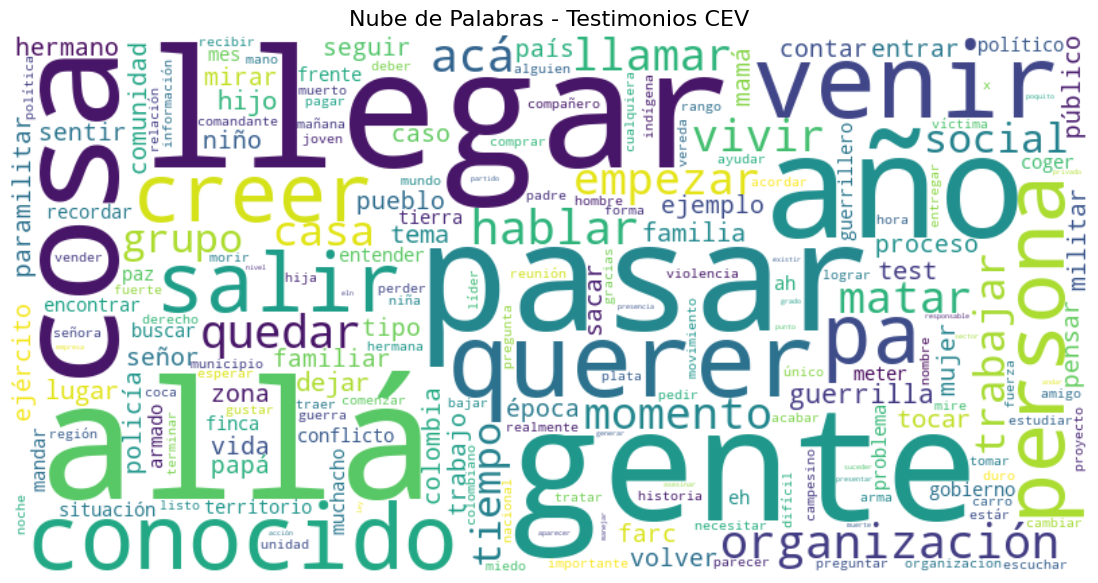

In [4]:
nube_palabras(df_testimonios, "contenido_preprocesado", min_len=1, titulo="Nube de Palabras - Testimonios CEV")

### Diversidad lexica

In [5]:
diversidad_lexica( df_libro, "contenido_preprocesado" , 1)

=== Informe de Diversidad L√©xica (Corpus) ===
Tokens totales:       57846
Tipos √∫nicos:         8615
TTR (Type-Token Ratio): 0.1489
RTTR (Root TTR):        35.8194


In [6]:
diversidad_lexica(df_testimonios, "contenido_preprocesado" , 1)

=== Informe de Diversidad L√©xica (Corpus) ===
Tokens totales:       9464382
Tipos √∫nicos:         116107
TTR (Type-Token Ratio): 0.0123
RTTR (Root TTR):        37.7409


---
---
## Desarrollo del Modelo de Recuperaci√≥n de Informaci√≥n

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import ast
import numpy as np
import math
import seaborn as sns

### Transforms data

In [11]:
# Convertir las cadenas de listas de vuelta a listas
df_libro["contenido_preprocesado"] = df_libro["contenido_preprocesado"].apply(ast.literal_eval)
df_testimonios["contenido_preprocesado"] = df_testimonios["contenido_preprocesado"].apply(ast.literal_eval)

In [12]:
# Convertir las listas de listas en texto plano
df_libro["contenido_texto"] = df_libro["contenido_preprocesado"].apply(lambda row: " ".join([word for phrase in row for word in phrase]))
df_testimonios["contenido_texto"] = df_testimonios["contenido_preprocesado"].apply(lambda row: " ".join([word for phrase in row for word in phrase]))

### Crear matriz Tfidf

Se observa un total de 8344 features en la matriz tfidf y un total de 21 secciones que seran las preprocesadas en el libro.

In [13]:
tfidf = TfidfVectorizer()
tfs = tfidf.fit_transform(df_libro["contenido_texto"])

In [14]:
print(len(tfidf.get_feature_names_out()))
print(tfidf.get_feature_names_out())

8344
['abad√≠a' 'abajito' 'abajo' ... '√∫nico' '√∫rsula' '√∫til']


In [15]:
secc_num, feature_num = tfs.shape
feature_names = tfidf.get_feature_names_out()
print("# secciones: %d, n_features: %d" % tfs.shape)

# secciones: 21, n_features: 8344


In [16]:
print("###### Calculo de Feature Names ######")
for x in range(0, feature_num):
    print(" # ", x ," - ",feature_names[x], " \t - ", [tfs[n,x] for n in range(0, secc_num)])

###### Calculo de Feature Names ######
 #  0  -  abad√≠a  	 -  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008375385001461663, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 #  1  -  abajito  	 -  [0.0, 0.0, 0.0, 0.0, 0.0, 0.021050091143258856, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 #  2  -  abajo  	 -  [0.0, 0.0, 0.0, 0.0, 0.0, 0.016756017855219185, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009341746603356505, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020999641097042037, 0.0]
 #  3  -  abanderada  	 -  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020590945413691684, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 #  4  -  abanderar  	 -  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008375385001461663, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 #  5  -  abandonado  	 -  [0.008953067458454667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01670913593553866, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 #  6  -  abandonar  	 

---
---
## Implementaci√≥n de M√©tricas de Relevancia

In [17]:
def as_doc(text):
    return [text]
    
response = tfidf.transform(as_doc(df_testimonios["contenido_texto"].iloc[0]))
print('response:', response)

response: <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1126 stored elements and shape (1, 8344)>
  Coords	Values
  (0, 8341)	0.0033831009486120197
  (0, 8340)	0.038296671232618866
  (0, 8336)	0.009574167808154717
  (0, 8335)	0.02150017910785846
  (0, 8333)	0.010672330185259728
  (0, 8324)	0.01908296039652176
  (0, 8319)	0.07607725078804004
  (0, 8315)	0.0194359031351501
  (0, 8301)	0.004300035821571692
  (0, 8273)	0.02480908385844852
  (0, 8230)	0.005039293301042544
  (0, 8228)	0.0058975085691969865
  (0, 8227)	0.005039293301042544
  (0, 8219)	0.015242207328273742
  (0, 8216)	0.005336165092629864
  (0, 8210)	0.007621103664136871
  (0, 8207)	0.020977072335181167
  (0, 8206)	0.007621103664136871
  (0, 8205)	0.009574167808154717
  (0, 8204)	0.09574167808154718
  (0, 8194)	0.01417661934768487
  (0, 8190)	0.015242207328273742
  (0, 8188)	0.03372679408960485
  (0, 8178)	0.010672330185259728
  (0, 8176)	0.04012097904132108
  :	:
  (0, 174)	0.0060442877143698425
  (0, 160)	0.0

### Comparacion con entrevistas

In [18]:
def as_doc(text):
    return [text]
    
response = tfidf.transform(as_doc(df_testimonios["contenido_texto"].iloc[0]))
print('response:', response)

response: <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1126 stored elements and shape (1, 8344)>
  Coords	Values
  (0, 8341)	0.0033831009486120197
  (0, 8340)	0.038296671232618866
  (0, 8336)	0.009574167808154717
  (0, 8335)	0.02150017910785846
  (0, 8333)	0.010672330185259728
  (0, 8324)	0.01908296039652176
  (0, 8319)	0.07607725078804004
  (0, 8315)	0.0194359031351501
  (0, 8301)	0.004300035821571692
  (0, 8273)	0.02480908385844852
  (0, 8230)	0.005039293301042544
  (0, 8228)	0.0058975085691969865
  (0, 8227)	0.005039293301042544
  (0, 8219)	0.015242207328273742
  (0, 8216)	0.005336165092629864
  (0, 8210)	0.007621103664136871
  (0, 8207)	0.020977072335181167
  (0, 8206)	0.007621103664136871
  (0, 8205)	0.009574167808154717
  (0, 8204)	0.09574167808154718
  (0, 8194)	0.01417661934768487
  (0, 8190)	0.015242207328273742
  (0, 8188)	0.03372679408960485
  (0, 8178)	0.010672330185259728
  (0, 8176)	0.04012097904132108
  :	:
  (0, 174)	0.0060442877143698425
  (0, 160)	0.0

In [19]:
cosine_similarity_response =  cosine_similarity(response, tfs)

In [20]:
print("n_question: %d, n_features: %d" % response.shape)
print("cosine_similarity ", cosine_similarity_response)

n_question: 1, n_features: 8344
cosine_similarity  [[0.23927345 0.35324754 0.2409658  0.26410221 0.18034888 0.19233131
  0.23729826 0.09998196 0.25133735 0.23922671 0.18774492 0.25869924
  0.10970607 0.28713049 0.10400472 0.07666309 0.14256311 0.14284579
  0.2181922  0.19777952 0.22523872]]


In [21]:
def compute_similarities(doc):
    # Transform single doc into TF-IDF using the trained vectorizer
    response = tfidf.transform([doc])
    # Cosine similarity vs. all docs in libro
    sims = cosine_similarity(response, tfs)[0]  # [0] to flatten 2D ‚Üí 1D array
    return sims

# Apply row by row
df_testimonios["cosine_similarities"] = df_testimonios["contenido_texto"].apply(compute_similarities)

In [22]:
df_testimonios["cosine_similarities"].iloc[0]

array([0.23927345, 0.35324754, 0.2409658 , 0.26410221, 0.18034888,
       0.19233131, 0.23729826, 0.09998196, 0.25133735, 0.23922671,
       0.18774492, 0.25869924, 0.10970607, 0.28713049, 0.10400472,
       0.07666309, 0.14256311, 0.14284579, 0.2181922 , 0.19777952,
       0.22523872])

In [23]:
top_n = 5
df_testimonios["top_matches"] = df_testimonios["cosine_similarities"].apply(
    lambda sims: sorted(enumerate(sims), key=lambda x: x[1], reverse=True)[:top_n]
)

In [24]:
df_testimonios["top_matches"].iloc[0]

[(1, 0.35324753731078257),
 (13, 0.2871304890086708),
 (3, 0.26410220958765934),
 (11, 0.2586992418998999),
 (8, 0.2513373536292331)]

### Rocchio

El modelo Rocchio ajusta el vector de consulta en el espacio vectorial (TF-IDF) usando documentos relevantes y no relevantes que el usuario marca.

Interpretaci√≥n:

* Empiezas con la consulta original.
* Le agregas ‚Äúpeso‚Äù de los documentos relevantes.
* Le restas ‚Äúpeso‚Äù de los documentos no relevantes.
* Resultado: un query vector modificado, que refleja mejor la intenci√≥n del usuario.

Es un m√©todo de realimentaci√≥n de relevancia (relevance feedback) que ajusta el vector de consulta en el espacio vectorial.

1.  Tienes un espacio de documentos representados con TF-IDF.

2.  Tomas tu consulta original y la conviertes en vector (q‚ÇÄ).

3.  Rocchio la ‚Äúmueve‚Äù en ese espacio, agregando peso hacia los documentos relevantes y alej√°ndose de los no relevantes:

4.  Una vez obtienes qnuevo, necesitas comparar ese vector contra los documentos ‚Üí y ah√≠ entra la similitud coseno.

* Cosine Similarity: m√©trica de comparaci√≥n entre vectores (cu√°n ‚Äúcerca‚Äù est√°n dos documentos o una consulta y un documento).

* Rocchio: t√©cnica que modifica la consulta para que, al medir con cosine, los documentos relevantes queden m√°s cerca y los no relevantes m√°s lejos.

In [25]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def rocchio(query_vec, tfs, relevant_idx=None, nonrelevant_idx=None, alpha=1.0, beta=0.75, gamma=0.15):
    """
    query_vec: vector TF-IDF de la consulta (1 x n_features)
    tfs: matriz TF-IDF de todos los documentos (n_docs x n_features)
    relevant_idx: lista de √≠ndices de docs relevantes
    nonrelevant_idx: lista de √≠ndices de docs no relevantes
    """
    q0 = query_vec.toarray()[0]
    q_new = alpha * q0

    if relevant_idx:
        q_new += beta * np.mean(tfs[relevant_idx].toarray(), axis=0)

    if nonrelevant_idx:
        q_new -= gamma * np.mean(tfs[nonrelevant_idx].toarray(), axis=0)

    return q_new.reshape(1, -1)

In [26]:
# Aplicar a todas las entrevistas
all_rocchio_scores = []
all_rocchio_top = []

for query in df_testimonios["contenido_texto"]:
    q_vec = tfidf.transform([query])

    # Nota: si no defines relevantes/no relevantes, usamos solo q0 (consulta original)
    q_new = rocchio(q_vec, tfs, relevant_idx=[], nonrelevant_idx=[])

    # Similitud coseno entre la nueva consulta y todo libro
    scores = cosine_similarity(q_new, tfs)[0]
    all_rocchio_scores.append(scores)

    # Top-5 documentos m√°s similares
    top5 = sorted(enumerate(scores), key=lambda x: x[1], reverse=True)[:5]
    all_rocchio_top.append(top5)

df_testimonios["rocchio"] = all_rocchio_scores
df_testimonios["rocchio_top"] = all_rocchio_top


In [27]:
df_testimonios["rocchio"].iloc[0]

array([0.23927345, 0.35324754, 0.2409658 , 0.26410221, 0.18034888,
       0.19233131, 0.23729826, 0.09998196, 0.25133735, 0.23922671,
       0.18774492, 0.25869924, 0.10970607, 0.28713049, 0.10400472,
       0.07666309, 0.14256311, 0.14284579, 0.2181922 , 0.19777952,
       0.22523872])

In [28]:
df_testimonios["rocchio_top"].iloc[0]

[(1, 0.3532475373107833),
 (13, 0.2871304890086708),
 (3, 0.26410220958765956),
 (11, 0.25869924189989996),
 (8, 0.25133735362923315)]

In [29]:
df_testimonios["rocchio_top"]

0       [(1, 0.3532475373107833), (13, 0.2871304890086...
1       [(8, 0.3382385449470131), (3, 0.31420984173693...
2       [(1, 0.3298399836061663), (11, 0.3185238423015...
3       [(18, 0.38285406104429953), (19, 0.34976598466...
4       [(3, 0.30265209466895704), (8, 0.2864505150960...
                              ...                        
2211    [(1, 0.288410166768632), (0, 0.263415158400402...
2212    [(18, 0.269061565161837), (13, 0.2644443391722...
2213    [(18, 0.30803806733076583), (1, 0.304224492359...
2214    [(2, 0.3375898416983896), (1, 0.31929619505857...
2215    [(0, 0.25441388682072996), (2, 0.2541800720410...
Name: rocchio_top, Length: 2216, dtype: object

### Okapi BM25
BM25 es un modelo probabil√≠stico basado en frecuencia de t√©rminos (no en TF-IDF).
Para cada t√©rmino de la consulta mide qu√© tan representativo es en el documento, ajustando por:

Longitud del documento (‚à£ùëë‚à£): documentos m√°s largos no deben dar ventaja injusta.

Frecuencia del t√©rmino en el documento (ùëì(ùë°,ùëë).

IDF (inversa de frecuencia de documento): t√©rminos poco frecuentes en la colecci√≥n tienen m√°s peso.

Interpretaci√≥n:

* Si un t√©rmino aparece mucho en un documento, la relevancia aumenta pero se
satura (no crece infinito).
* Documentos largos se penalizan ligeramente.
* Palabras raras en la colecci√≥n (alto IDF) pesan m√°s.

In [30]:
import math

def compute_idf(corpus_tokens):
    """
    Calcula los valores IDF para cada t√©rmino del corpus.
    corpus_tokens: lista de listas de palabras por documento
    """
    N = len(corpus_tokens)
    df = {}
    for doc in corpus_tokens:
        for term in set(doc):  # contamos solo 1 vez por doc
            df[term] = df.get(term, 0) + 1
    idf = {term: math.log((N - df[term] + 0.5) / (df[term] + 0.5) + 1) for term in df}
    return idf

def bm25_score(query_tokens, doc_tokens, idf, avgdl, k1=1.5, b=0.75):
    """
    Calcula BM25 entre una consulta y un documento.
    """
    score = 0.0
    doc_len = len(doc_tokens)

    # frecuencias de t√©rminos en el documento
    freqs = {}
    for term in doc_tokens:
        freqs[term] = freqs.get(term, 0) + 1

    for term in query_tokens:
        if term not in idf:
            continue
        f = freqs.get(term, 0)
        if f == 0:
            continue
        denom = f + k1 * (1 - b + b * doc_len / avgdl)
        score += idf[term] * (f * (k1 + 1)) / denom
    return score

def bm25_pipeline(corpus_tokens, query_tokens, k1=1.5, b=0.75):
    """
    Calcula BM25 de una consulta contra todo el corpus.
    """
    idf = compute_idf(corpus_tokens)
    avgdl = sum(len(doc) for doc in corpus_tokens) / len(corpus_tokens)

    scores = [bm25_score(query_tokens, doc, idf, avgdl, k1, b) for doc in corpus_tokens]
    return scores

In [31]:
# Para LIBRO
df_libro["contenido_tokens"] = df_libro["contenido_preprocesado"].apply(
    lambda row: [word for phrase in row for word in phrase]
)

# Para ENTREVISTAS
df_testimonios["contenido_tokens"] = df_testimonios["contenido_preprocesado"].apply(
    lambda row: [word for phrase in row for word in phrase]
)

all_bm25_scores = []
all_bm25_top = []

idf = compute_idf(df_libro["contenido_tokens"])
avgdl = sum(len(doc) for doc in df_libro["contenido_tokens"]) / len(df_libro["contenido_tokens"])

for query in df_testimonios["contenido_tokens"]:
    scores = [bm25_score(query, doc, idf, avgdl) for doc in df_libro["contenido_tokens"]]
    all_bm25_scores.append(scores)

    top5 = sorted(enumerate(scores), key=lambda x: x[1], reverse=True)[:5]
    all_bm25_top.append(top5)

df_testimonios["bm25"] = all_bm25_scores
df_testimonios["bm25_top"] = all_bm25_top

In [32]:
df_testimonios["bm25_top"].iloc[0]

[(1, 2618.6281489861217),
 (9, 2037.8642695101812),
 (2, 1922.3124241399055),
 (13, 1791.6453402345965),
 (0, 1782.2314346195428)]

---
---
## Comparacion corpus


Diferencias en escala

1.  TF-IDF + Cosine / Rocchio

* El cosine_similarity siempre devuelve valores en el rango [0, 1].

* 1 = vectores id√©nticos, 0 = no comparten nada.

* Es una m√©trica normalizada ‚Üí siempre acotada.

2.  BM25

* Los valores no est√°n normalizados.

* Cada t√©rmino contribuye al score de manera acumulativa.

* Cuantos m√°s t√©rminos de la consulta aparecen en el documento (y con alta frecuencia), m√°s grande el score.

* Escala depende de:

  *  Tama√±o de la consulta (m√°s palabras ‚Üí score m√°s alto).

  * Frecuencias de los t√©rminos.

  * Valores de los hiperpar√°metros
  
* No tiene un l√≠mite superior fijo: 5, 10, 20 o m√°s son posibles.

In [33]:
def extract_doc_ids(column):
    return [doc_id for row in df_testimonios[column] for doc_id, score in row]

# Listas con los doc_ids que aparecen en Top-5
cosine_docs = extract_doc_ids("top_matches")
rocchio_docs = extract_doc_ids("rocchio_top")
bm25_docs   = extract_doc_ids("bm25_top")

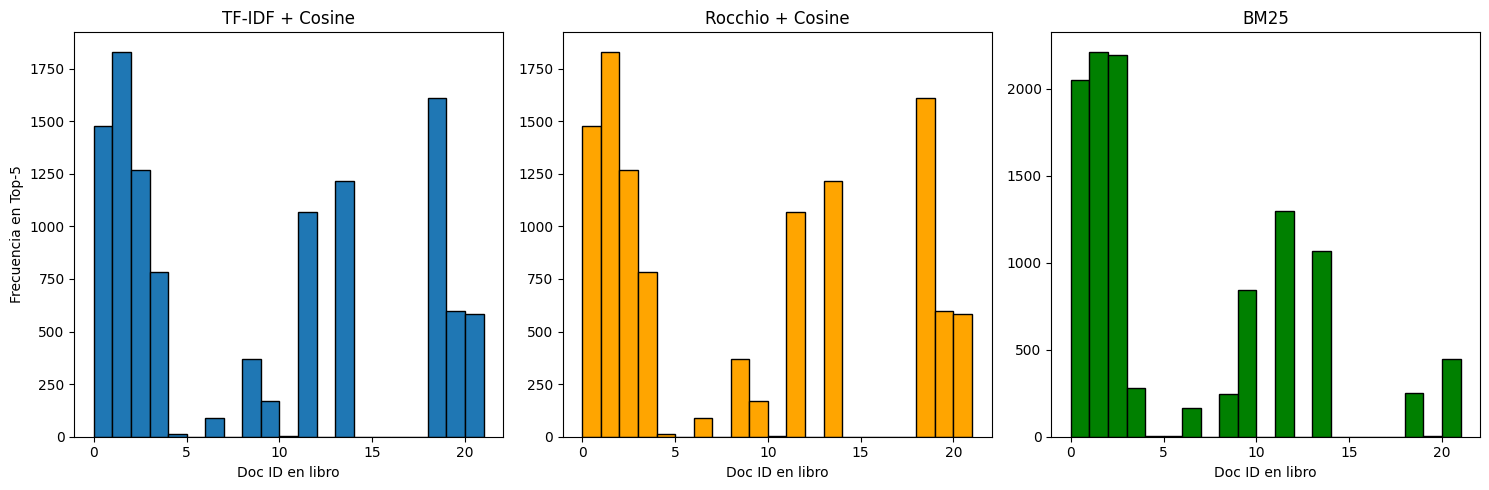

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

# --- TF-IDF + Cosine ---
plt.subplot(1,3,1)
plt.hist(cosine_docs, bins=range(len(df_libro)+1), edgecolor="black")
plt.title("TF-IDF + Cosine")
plt.xlabel("Doc ID en libro")
plt.ylabel("Frecuencia en Top-5")

# --- Rocchio ---
plt.subplot(1,3,2)
plt.hist(rocchio_docs, bins=range(len(df_libro)+1), edgecolor="black", color="orange")
plt.title("Rocchio + Cosine")
plt.xlabel("Doc ID en libro")

# --- BM25 ---
plt.subplot(1,3,3)
plt.hist(bm25_docs, bins=range(len(df_libro)+1), edgecolor="black", color="green")
plt.title("BM25")
plt.xlabel("Doc ID en libro")

plt.tight_layout()
plt.show()


In [35]:
def build_top5_matrix(df, column_name, n_docs):
    """
    Construye una matriz (entrevistas x documentos) con los scores de los top-5.
    df: DataFrame de entrevistas
    column_name: "top_matches", "rocchio_top" o "bm25_top"
    n_docs: n√∫mero de documentos en libro
    """
    matrix = np.zeros((len(df), n_docs))
    for i, row in enumerate(df[column_name]):
        for doc_id, score in row:
            matrix[i, doc_id] = score
    return pd.DataFrame(matrix, index=[f"E{i}" for i in range(len(df))],
                        columns=[f"S{j}" for j in range(n_docs)])


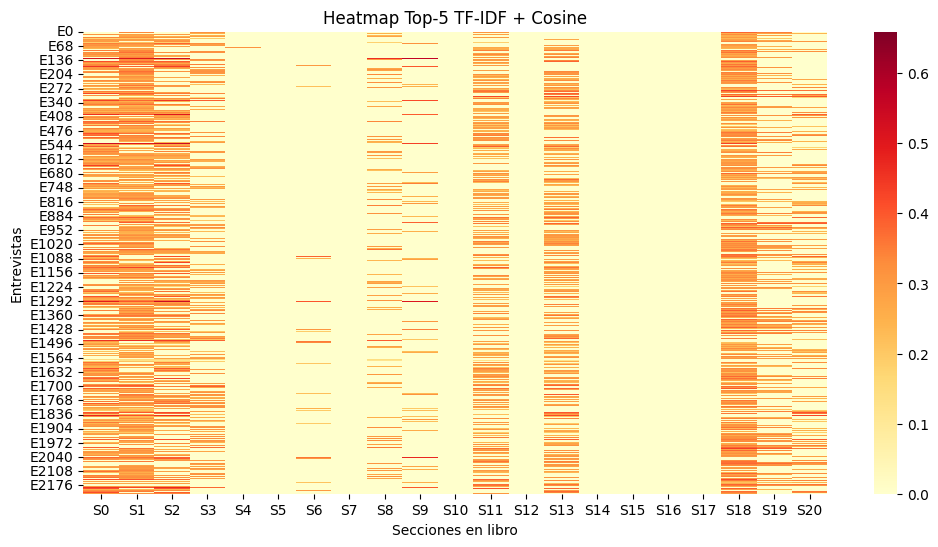

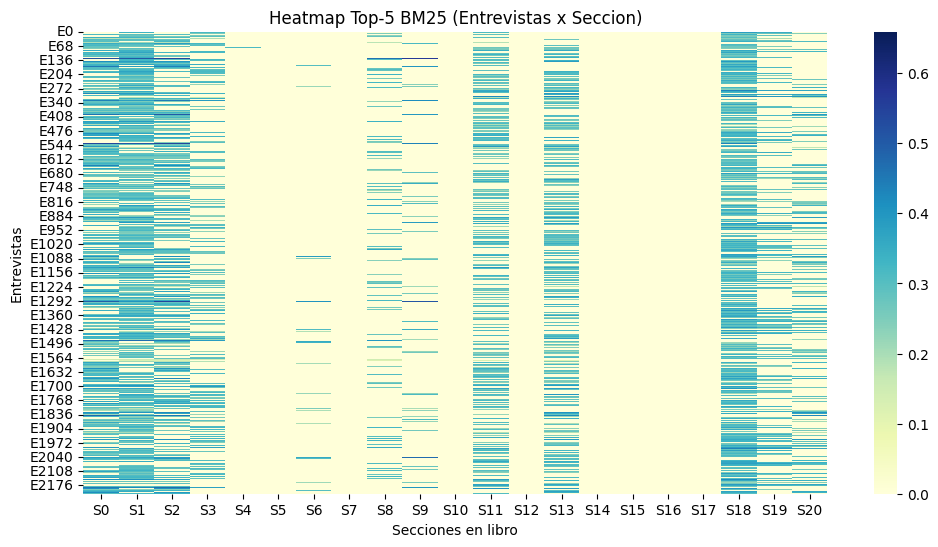

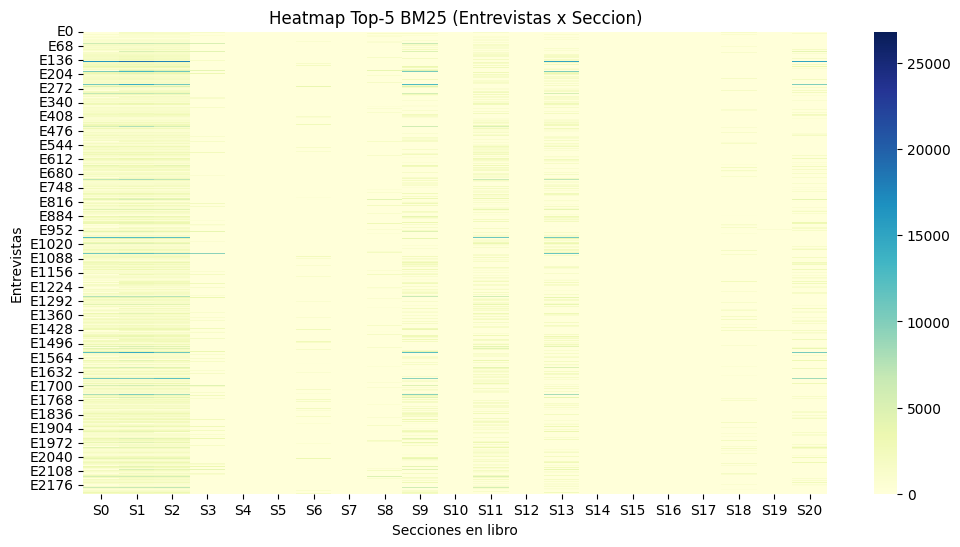

In [36]:
cosine_matrix = build_top5_matrix(df_testimonios, "top_matches", len(df_libro))
rocchio_matrix = build_top5_matrix(df_testimonios, "rocchio_top", len(df_libro))
bm25_matrix = build_top5_matrix(df_testimonios, "bm25_top", len(df_libro))

# Ejemplo para Cosine
plt.figure(figsize=(12,6))
sns.heatmap(cosine_matrix, cmap="YlOrRd", annot=False, cbar=True)
plt.title("Heatmap Top-5 TF-IDF + Cosine")
plt.xlabel("Secciones en libro")
plt.ylabel("Entrevistas")
plt.show()

# Construir matriz para Rocchio
bm25_matrix = build_top5_matrix(df_testimonios, "bm25_top", len(df_libro))

plt.figure(figsize=(12,6))
sns.heatmap(rocchio_matrix, cmap="YlGnBu", annot=False, cbar=True)
plt.title("Heatmap Top-5 BM25 (Entrevistas x Seccion)")
plt.xlabel("Secciones en libro")
plt.ylabel("Entrevistas")
plt.show()

# Construir matriz para BM25
bm25_matrix = build_top5_matrix(df_testimonios, "bm25_top", len(df_libro))

plt.figure(figsize=(12,6))
sns.heatmap(bm25_matrix, cmap="YlGnBu", annot=False, cbar=True)
plt.title("Heatmap Top-5 BM25 (Entrevistas x Seccion)")
plt.xlabel("Secciones en libro")
plt.ylabel("Entrevistas")
plt.show()


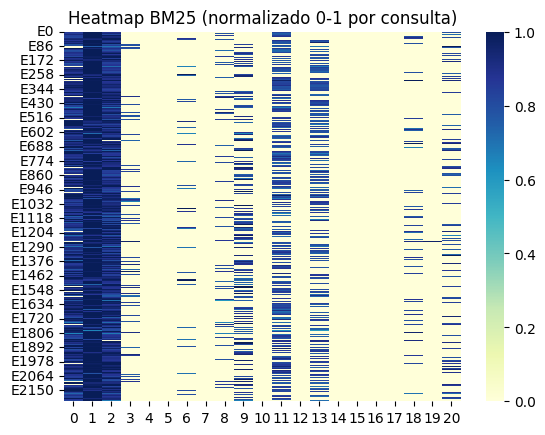

In [37]:
from sklearn.preprocessing import minmax_scale

# Normalizamos la matriz BM25 fila por fila (cada query)
bm25_matrix_norm = bm25_matrix.apply(lambda row: minmax_scale(row), axis=1, result_type="expand")

sns.heatmap(bm25_matrix_norm, cmap="YlGnBu")
plt.title("Heatmap BM25 (normalizado 0-1 por consulta)")
plt.show()

In [38]:
import numpy as np
import pandas as pd

def build_top5_count_matrix(df, column_name, n_docs):
    """
    Construye una matriz (entrevistas x documentos) con la frecuencia de aparici√≥n en Top-5.
    df: DataFrame de entrevistas
    column_name: "top_matches", "rocchio_top" o "bm25_top"
    n_docs: n√∫mero de documentos en libro
    """
    matrix = np.zeros((len(df), n_docs))
    for i, row in enumerate(df[column_name]):
        for doc_id, _ in row:   # ignoramos score, solo doc_id
            matrix[i, doc_id] += 1
    return pd.DataFrame(matrix, index=[f"E{i}" for i in range(len(df))],
                        columns=[f"S{j}" for j in range(n_docs)])


In [39]:
cosine_count = build_top5_count_matrix(df_testimonios, "top_matches", len(df_libro))
rocchio_count = build_top5_count_matrix(df_testimonios, "rocchio_top", len(df_libro))
bm25_count   = build_top5_count_matrix(df_testimonios, "bm25_top", len(df_libro))

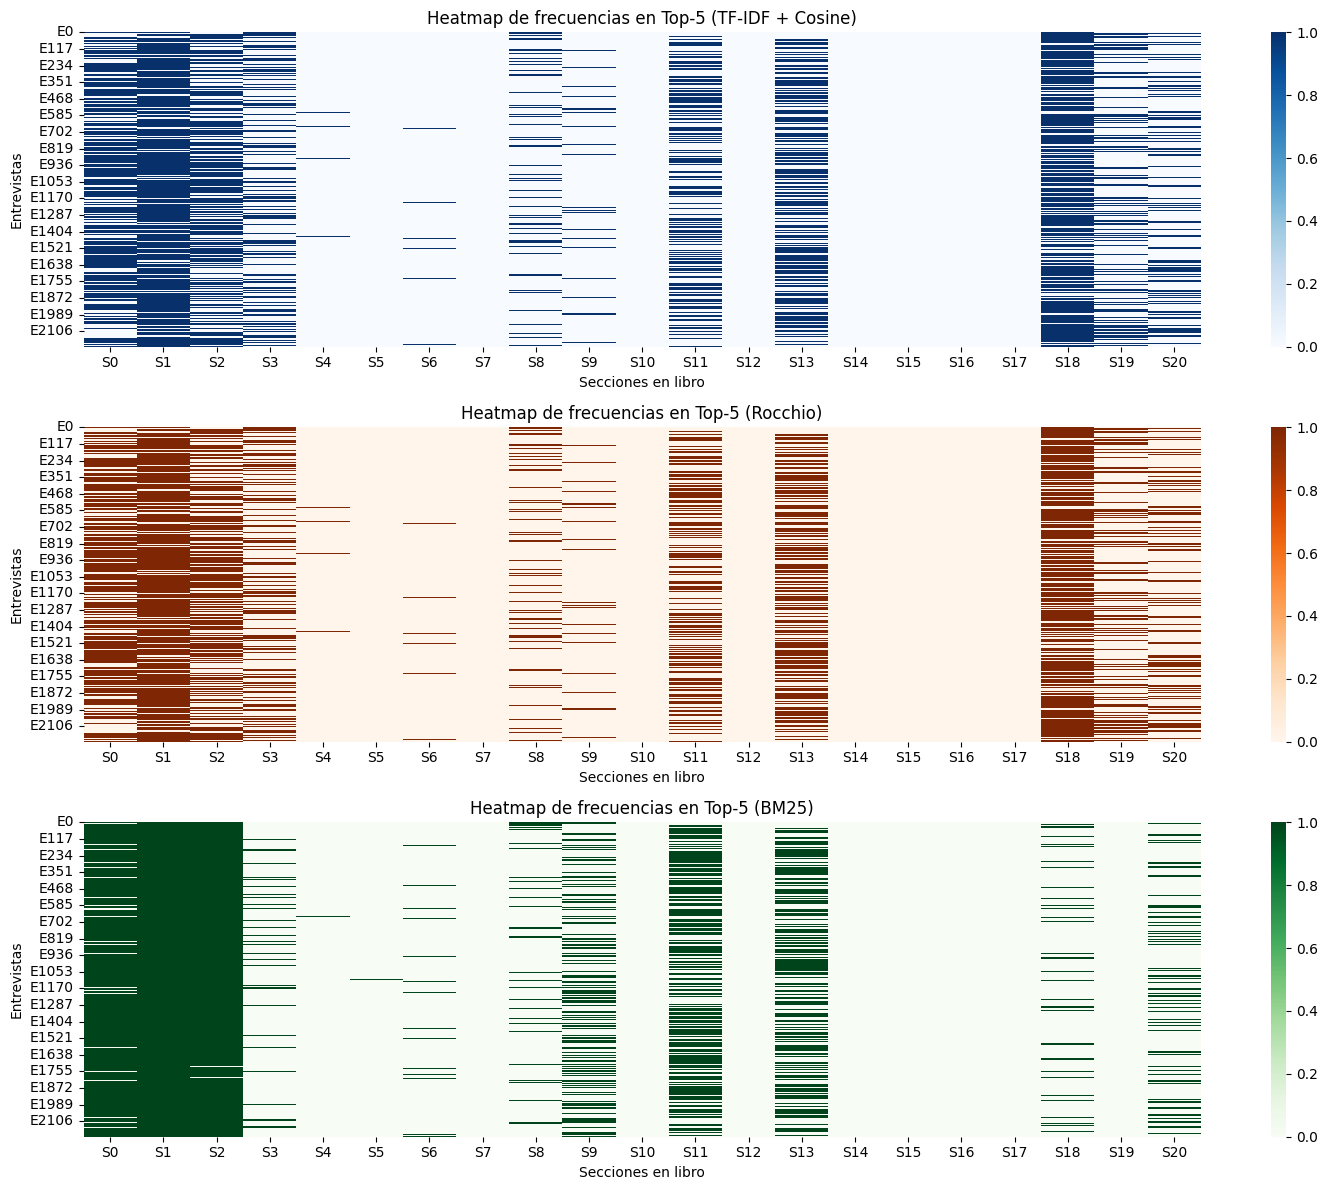

In [40]:
plt.figure(figsize=(15,12))

# --- TF-IDF + Cosine ---
plt.subplot(3,1,1)
sns.heatmap(cosine_count, cmap="Blues", cbar=True, annot=False)
plt.title("Heatmap de frecuencias en Top-5 (TF-IDF + Cosine)")
plt.xlabel("Secciones en libro")
plt.ylabel("Entrevistas")

# --- Rocchio ---
plt.subplot(3,1,2)
sns.heatmap(rocchio_count, cmap="Oranges", cbar=True, annot=False)
plt.title("Heatmap de frecuencias en Top-5 (Rocchio)")
plt.xlabel("Secciones en libro")
plt.ylabel("Entrevistas")

# --- BM25 ---
plt.subplot(3,1,3)
sns.heatmap(bm25_count, cmap="Greens", cbar=True, annot=False)
plt.title("Heatmap de frecuencias en Top-5 (BM25)")
plt.xlabel("Secciones en libro")
plt.ylabel("Entrevistas")

plt.tight_layout()
plt.show()


In [41]:
df_libro

seccion                                  seccion_principal  \
0   Mujeres  ¬øQu√© pas√≥? Significados y  magnitudes de lo su...   
1   Mujeres  ¬øQu√© pas√≥? Significados y  magnitudes de lo su...   
2   Mujeres  ¬øQu√© pas√≥? Significados y  magnitudes de lo su...   
3   Mujeres  ¬øQu√© pas√≥? Significados y  magnitudes de lo su...   
4   Mujeres         ¬øPor qu√© pas√≥? Dimensiones del patriarcado   
5   Mujeres         ¬øPor qu√© pas√≥? Dimensiones del patriarcado   
6   Mujeres         ¬øPor qu√© pas√≥? Dimensiones del patriarcado   
7   Mujeres                         ¬øQu√© pas√≥ con lo que pas√≥?   
8   Mujeres                         ¬øQu√© pas√≥ con lo que pas√≥?   
9   Mujeres                         ¬øQu√© pas√≥ con lo que pas√≥?   
10  LGBTIQ+  ¬øQu√© pas√≥? Violencias contra las personas LGBT...   
11  LGBTIQ+  ¬øQu√© pas√≥? Violencias contra las personas LGBT...   
12  LGBTIQ+  ¬øQu√© pas√≥? Violencias contra las personas LGBT...   
13  LGBTIQ+  ¬øQu√© pas√≥? Violencias contra las personas LGBT...   
14  LGBTIQ+  ¬øQu√© pas√≥? Violencias contra las personas LGBT...   
15  LGBTIQ+  Los porqu√©s de la persecuci√≥n contra personas ...   
16  LGBTIQ+  Los porqu√©s de la persecuci√≥n contra personas ...   
17  LGBTIQ+  Los porqu√©s de la persecuci√≥n contra personas ...   
18  LGBTIQ+  ¬øQu√© pas√≥ con lo que les pas√≥ a las personas L...   
19  LGBTIQ+  ¬øQu√© pas√≥ con lo que les pas√≥ a las personas L...   
20  LGBTIQ+  ¬øQu√© pas√≥ con lo que les pas√≥ a las personas L...   

                                           subseccion  \
0              La guerra, el territorio y las mujeres   
1   Las violencias sexuales y reproductivas contra...   
2       Mujeres pol√≠ticas expulsadas de la democracia   
3   Las mujeres en la guerra: vinculaci√≥n e impact...   
4   El cont√≠nuum de violencias, una realidad que c...   
5   El mandato de las masculinidades guerreras y s...   
6   La desprotecci√≥n por parte del Estado en zonas...   
7        Impactos del conflicto armado en las mujeres   
8              Afrontamientos de las mujeres v√≠ctimas   
9   Resistencias, juntanza y organizaci√≥n: en las ...   
10  Una mirada general a las violencias contra las...   
11  Situaciones territoriales ilustrativas de la p...   
12  La persecuci√≥n contra personas LGBTIQ+ en el c...   
13  Patrones de persecuci√≥n contra las personas LG...   
14                              Otras consideraciones   
15  La herencia colonial como un factor hist√≥rico ...   
16                           Factores socioculturales   
17               Factores institucionales y pol√≠ticos   
18  Impactos de las violencias contra personas LGB...   
19  Afrontamientos de personas LGBTIQ+ v√≠ctimas de...   
20  Cuerpos disidentes que resisten y transforman ...   

                                            contenido  \
0   Las mujeres viven la guerra en sus territorios...   
1   Duele la lengua rota. \n¬øD√≥nde est√° mi femenin...   
2   ¬ª.\n\n¬øqu√© pas√≥? significados y magnitudes de ...   
3   Para algunas mujeres campesinas y de las clase...   
4   El cont√≠nuum se refiere a la persistencia de l...   
5   El concepto de masculinidades guerreras alude ...   
6   Colombia es un pa√≠s profundamente desigual en ...   
7   fueron desproporcionados justamente \npor la e...   
8   Resistir en medio de la guerra es trabajo de l...   
9   Las mujeres v√≠ctimas en Colombia se han sobrep...   
10  En atenci√≥n a su mandato, la Comisi√≥n emple√≥ v...   
11  La Comisi√≥n identific√≥ repertorios particulare...   
12  Cogieron a mi compa√±era, y fueron como \ncuatr...   
13  A estos muchachos gais los cogieron con dos fi...   
14  Aunque las violencias que configuran los reper...   
15  Hac√≠an comentarios y dec√≠an que nosotros √≠bamo...   
16  No iban a permitir que desviados \ncomo nosotr...   
17  ¬°Ni en la casa lo quieren a uno, \nahora el Es...   
18  Porque usted sabe que uno de gay \nen la vida ...   
19  La organizaci√≥n en t√©rminos pol√≠ticos, \nestar...   